<a href="https://colab.research.google.com/github/youssef893/Advanced-House-Picing/blob/main/advanced_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('/content/train.csv')
labels = data['SalePrice']
data = data.drop(['SalePrice', 'Id'], axis=1)

In [3]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [6]:
info = data.isna().sum()

In [7]:
columns = data.columns.values

In [8]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MSSubClass          56.897260
LotFrontage         70.049958
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
MasVnrArea         103.685262
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1978.506164
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea             2.758904
MiscVal   

In [9]:
data.mode()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal


In [10]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MSSubClass         50.0
LotFrontage        69.0
LotArea          9478.5
OverallQual         6.0
OverallCond         5.0
YearBuilt        1973.0
YearRemodAdd     1994.0
MasVnrArea          0.0
BsmtFinSF1        383.5
BsmtFinSF2          0.0
BsmtUnfSF         477.5
TotalBsmtSF       991.5
1stFlrSF         1087.0
2ndFlrSF            0.0
LowQualFinSF        0.0
GrLivArea        1464.0
BsmtFullBath        0.0
BsmtHalfBath        0.0
FullBath            2.0
HalfBath            0.0
BedroomAbvGr        3.0
KitchenAbvGr        1.0
TotRmsAbvGrd        6.0
Fireplaces          1.0
GarageYrBlt      1980.0
GarageCars          2.0
GarageArea        480.0
WoodDeckSF          0.0
OpenPorchSF        25.0
EnclosedPorch       0.0
3SsnPorch           0.0
ScreenPorch         0.0
PoolArea            0.0
MiscVal             0.0
MoSold              6.0
YrSold           2008.0
dtype: float64

In [11]:
col_types = data.dtypes

In [12]:
test = pd.read_csv('/content/test.csv')
id = test['Id']
test = test.drop(['Id'], axis=1)
data = pd.concat([data, test]).reset_index(drop=True)

MSSubClass ===> mean = 57.1377183967112 median = 50.0
MSZoning mode = 0    RL
dtype: object
LotFrontage ===> mean = 69.30579531442663 median = 68.0
LotArea ===> mean = 10168.11408016444 median = 9453.0
Street mode = 0    Pave
dtype: object
Alley mode = 0    Grvl
dtype: object
LotShape mode = 0    Reg
dtype: object
LandContour mode = 0    Lvl
dtype: object
Utilities mode = 0    AllPub
dtype: object
LotConfig mode = 0    Inside
dtype: object
LandSlope mode = 0    Gtl
dtype: object
Neighborhood mode = 0    NAmes
dtype: object
Condition1 mode = 0    Norm
dtype: object
Condition2 mode = 0    Norm
dtype: object
BldgType mode = 0    1Fam
dtype: object
HouseStyle mode = 0    1Story
dtype: object
OverallQual ===> mean = 6.089071599862967 median = 6.0
OverallCond ===> mean = 5.564576909900651 median = 5.0
YearBuilt ===> mean = 1971.3127783487496 median = 1973.0
YearRemodAdd ===> mean = 1984.2644741349777 median = 1993.0
RoofStyle mode = 0    Gable
dtype: object
RoofMatl mode = 0    CompShg
dtype

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly cl

GarageQual mode = 0    TA
dtype: object
GarageCond mode = 0    TA
dtype: object
PavedDrive mode = 0    Y
dtype: object
WoodDeckSF ===> mean = 93.70983213429257 median = 0.0
OpenPorchSF ===> mean = 47.486810551558754 median = 26.0
EnclosedPorch ===> mean = 23.098321342925658 median = 0.0
3SsnPorch ===> mean = 2.602261048304214 median = 0.0
ScreenPorch ===> mean = 16.062350119904078 median = 0.0
PoolArea ===> mean = 2.2517985611510793 median = 0.0
PoolQC mode = 0    Ex
1    Gd
dtype: object
Fence mode = 0    MnPrv
dtype: object
MiscFeature mode = 0    Shed
dtype: object
MiscVal ===> mean = 50.82596779719082 median = 0.0
MoSold ===> mean = 6.213086673518328 median = 6.0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly cl

YrSold ===> mean = 2007.7927372387803 median = 2008.0
SaleType mode = 0    WD
dtype: object
SaleCondition mode = 0    Normal
dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


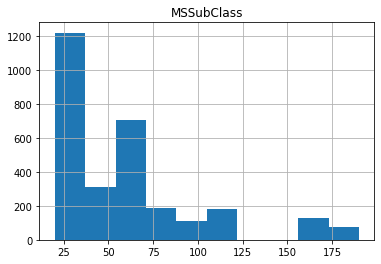

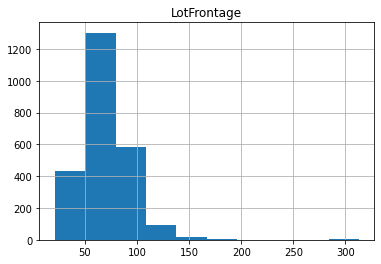

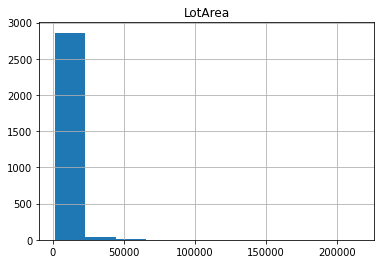

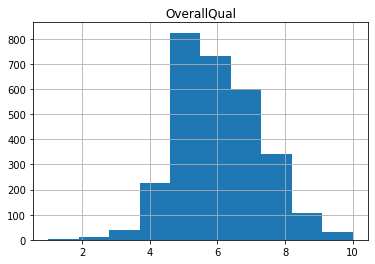

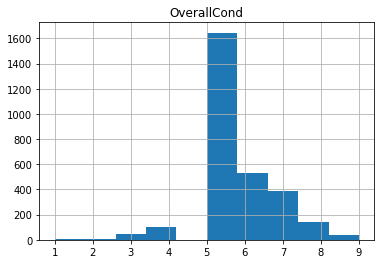

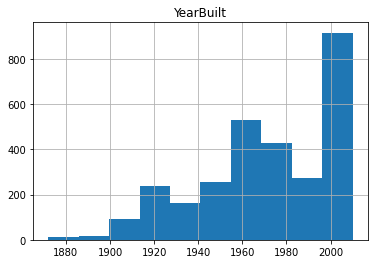

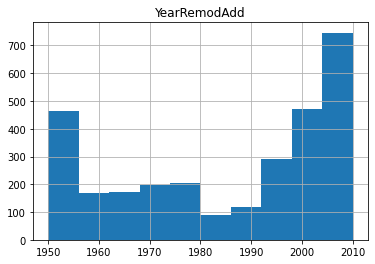

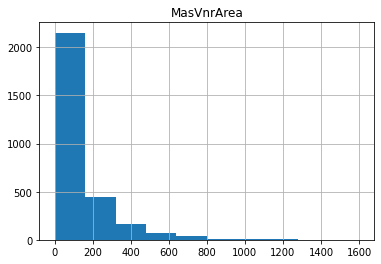

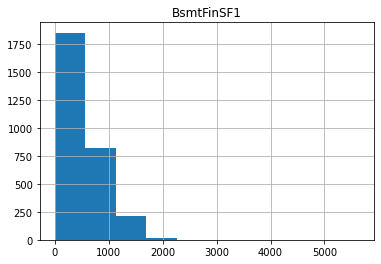

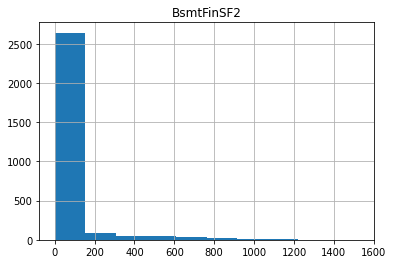

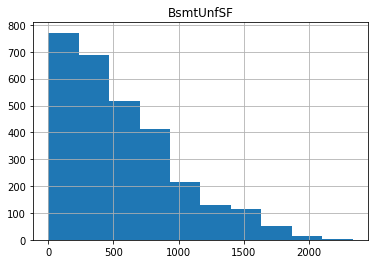

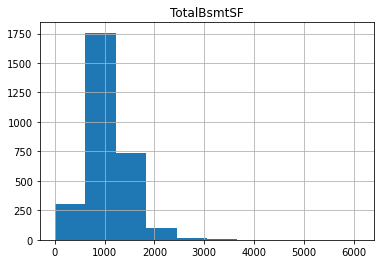

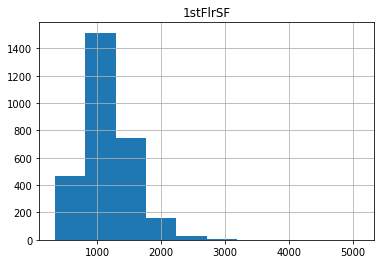

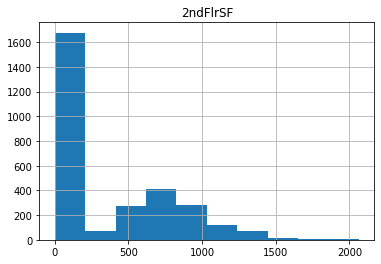

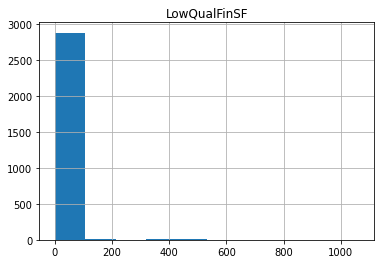

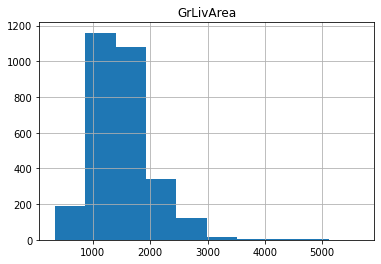

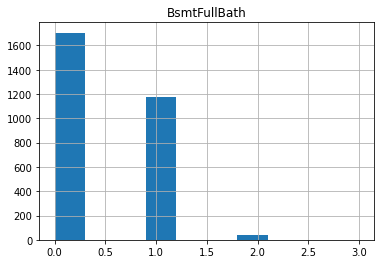

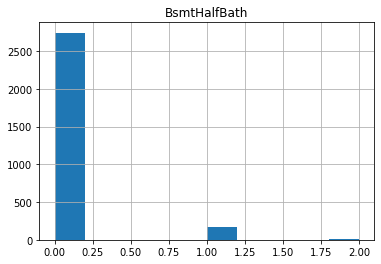

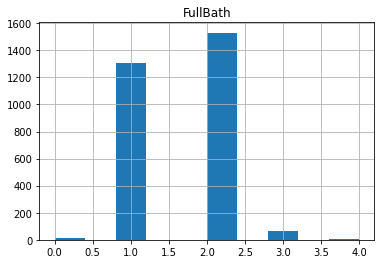

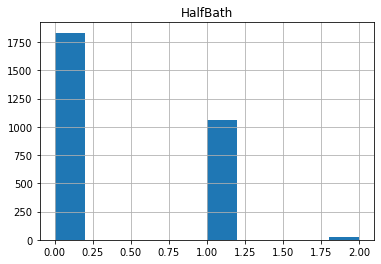

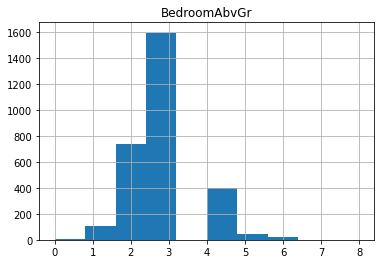

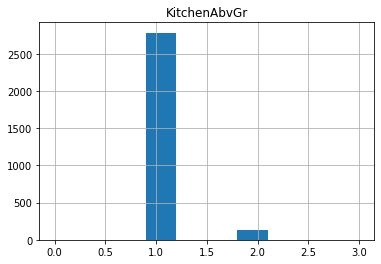

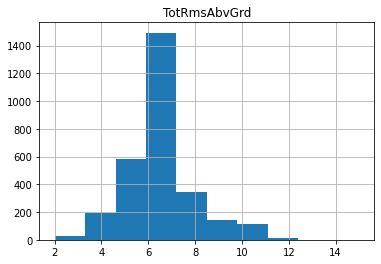

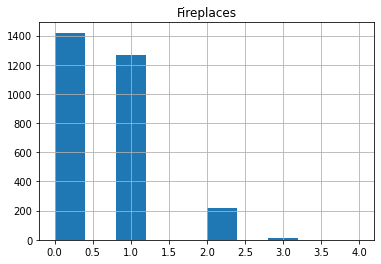

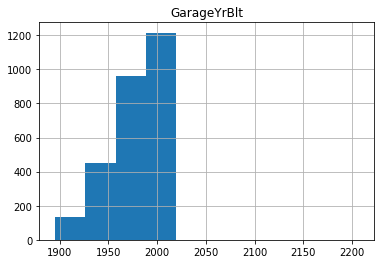

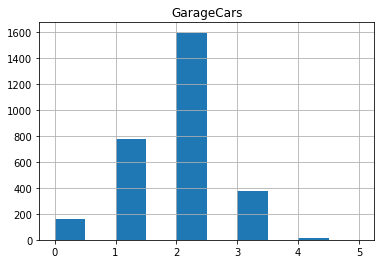

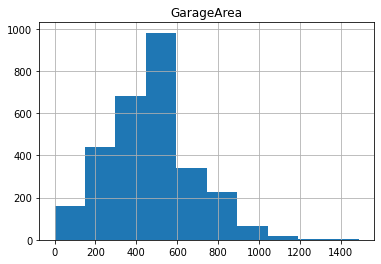

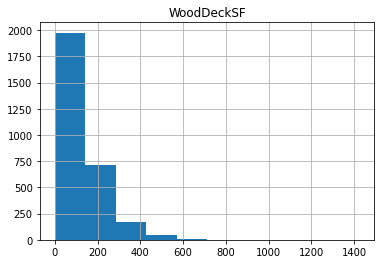

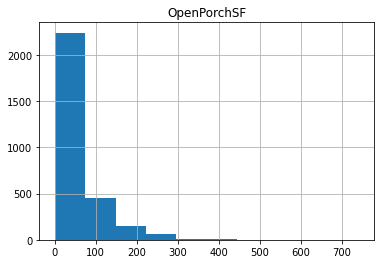

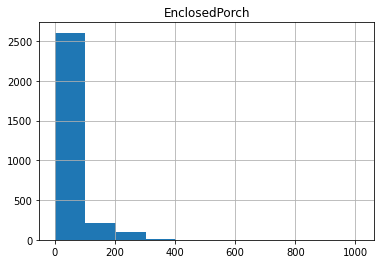

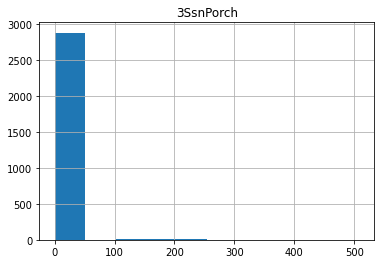

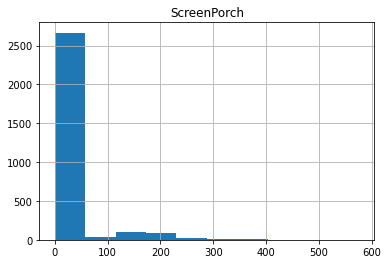

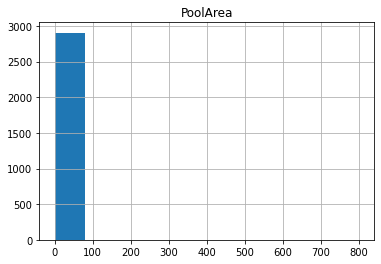

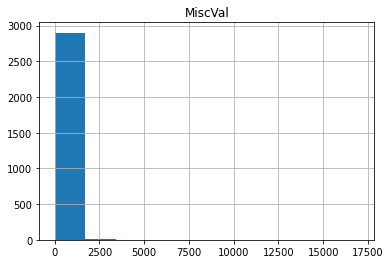

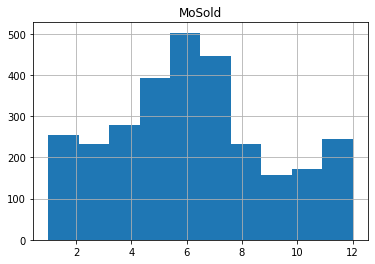

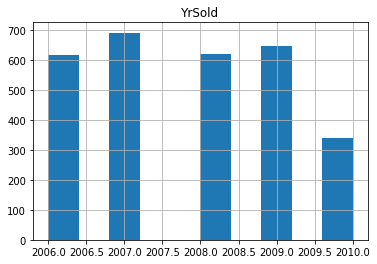

In [13]:
for i in range(len(columns)):
    if col_types[i] == 'object':
        print(f'{columns[i]} mode =', data[columns[i]].mode())
    else:
        print(f'{columns[i]} ===> mean =',data[columns[i]].mean(), "median =", data[columns[i]].median())
        data.hist(columns[i])

In [14]:
data['BsmtExposure'] = data['BsmtExposure'].fillna('no_basment')
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
for i in range(len(columns)):
    if col_types[i] == 'object':
        data[columns[i]] = data[columns[i]].fillna('no')
    else:
        mean = data[columns[i]].mean()
        median = data[columns[i]].median()
        if median == 0.0:
            data[columns[i]] = data[columns[i]].fillna(median)
        else:
            data[columns[i]] = data[columns[i]].fillna((mean + median) / 2)


In [15]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,no,Reg,Lvl,AllPub,Inside,...,0,0,no,no,no,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,no,Reg,Lvl,AllPub,FR2,...,0,0,no,no,no,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,no,IR1,Lvl,AllPub,Inside,...,0,0,no,no,no,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,no,IR1,Lvl,AllPub,Corner,...,0,0,no,no,no,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,no,IR1,Lvl,AllPub,FR2,...,0,0,no,no,no,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,no,Reg,Lvl,AllPub,Inside,...,0,0,no,no,no,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,no,Reg,Lvl,AllPub,Inside,...,0,0,no,no,no,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,no,Reg,Lvl,AllPub,Inside,...,0,0,no,no,no,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,no,Reg,Lvl,AllPub,Inside,...,0,0,no,MnPrv,Shed,700,7,2006,WD,Normal


In [16]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

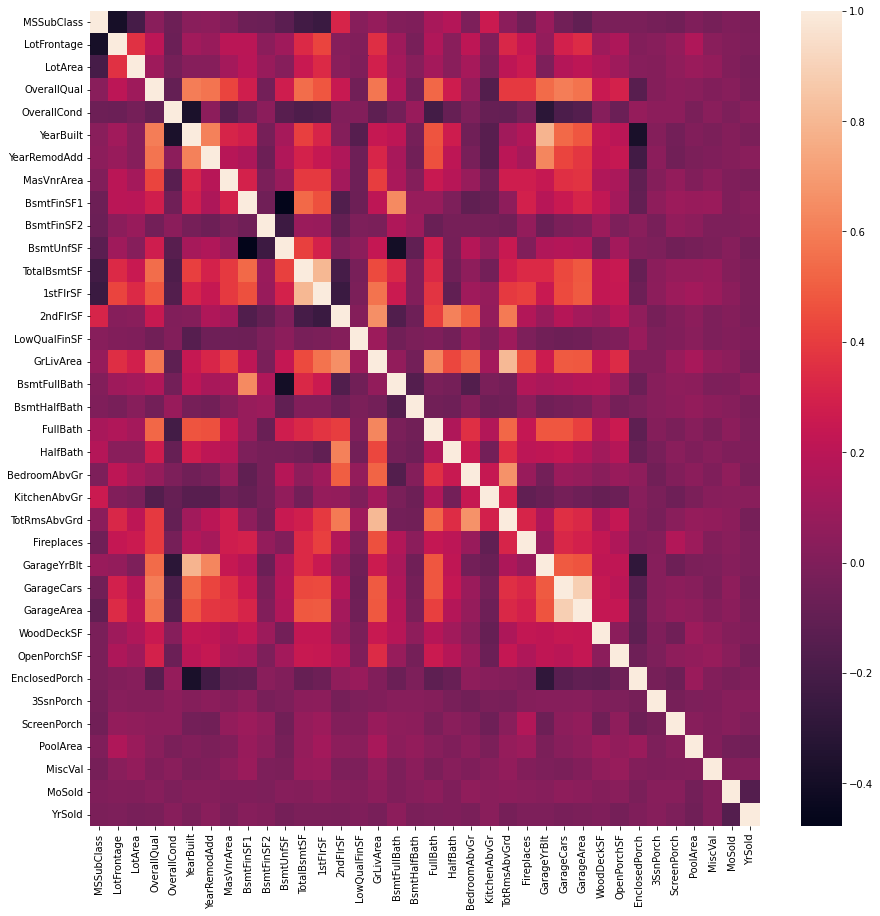

In [17]:
plt.figure(figsize= (15 , 15))
sns.heatmap(data.corr())

In [18]:
all_data = pd.get_dummies(data).reset_index(drop=True)
all_data.shape

(2919, 310)

In [19]:
data = all_data[0:1460]
test = all_data[1460:]
len(data)

1460

In [20]:
len(test)

1459

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(data, labels)
preds = model.predict(test)
preds = pd.DataFrame(preds, columns=['SalePrice'])


[03:05:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
preds.to_csv('house pricing.csv')